In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

In [247]:
data = pd.read_csv('student-mat.csv.txt')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [248]:
# The dataset being used for the task of students grade prediction is based on the achievements of the students of the Portuguese schools. 
# In this dataset the G1 represents the grades of the first period, G2 represents the grades of the second period, and G3 represents the final grades.

In [249]:
# Let's 1st select the necessary columns that we need to train a machine learning model for the task of student grade prediction.

data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
predict = 'G3'

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8) 

In [251]:
# Training a linear regression model

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
accuracy = linear_regression.score(x_test, y_test)
print(f"The Accuracy is {accuracy}")

The Accuracy is 0.9085420735999291


In [252]:
# The Linear Regression model is giving an accuracy of about 70% - 90%.
# Now, let's have a look at the predictions made by the students' grade prediction model.

predictions = linear_regression.predict(x_test)
for i in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

[[13.95124705  3.37145796  4.2599267  10.61176841  3.37145796]
 [13.95124705 13.95124705  4.2599267  10.61176841  7.04482931]
 [ 8.38419419  6.40484867  4.2599267  -0.4499137   7.41543718]
 ...
 [ 7.41543718  6.40484867  8.97238006 -0.4499137  -0.4499137 ]
 [16.89688766  8.60948266  8.97238006 10.61176841 10.61176841]
 [ 6.40484867 12.35296321  8.97238006 10.61176841 13.95124705]] [[[14 14  2  0  0]
  [ 6  5  1  3  0]
  [ 5  5  2  0 12]
  [ 9  9  2  0 56]
  [ 6  5  1  3  0]]

 [[14 14  2  0  0]
  [14 14  2  0  0]
  [ 5  5  2  0 12]
  [ 9  9  2  0 56]
  [10  8  1  3  3]]

 [[10  9  3  0  4]
  [ 8  7  1  0  0]
  [ 5  5  2  0 12]
  [ 8  0  1  0  0]
  [ 5  9  2  2  6]]

 ...

 [[ 5  9  2  2  6]
  [ 8  7  1  0  0]
  [10 10  4  0  0]
  [ 8  0  1  0  0]
  [ 8  0  1  0  0]]

 [[17 17  4  0  0]
  [10  9  2  0  4]
  [10 10  4  0  0]
  [ 9  9  2  0 56]
  [ 9  9  2  0 56]]

 [[ 8  7  1  0  0]
  [10 13  2  1  6]
  [10 10  4  0  0]
  [ 9  9  2  0 56]
  [14 14  2  0  0]]] [[14  0  5  8  0]
 [14 14  5

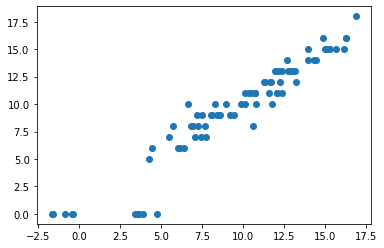

In [253]:
plt.scatter(predictions, y_test)

<AxesSubplot:>

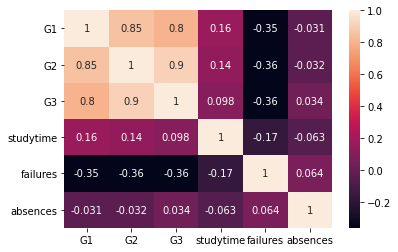

In [254]:
sns.heatmap(data.corr(), annot=True)